<a href="https://colab.research.google.com/github/Hiba-Rafique/AI_Project/blob/main/RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Libraries

In [ ]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Load Data From Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

base_path = "/content/drive/MyDrive/SongEval_RF_Data"

X_train = np.load(f"{base_path}/X_train.npy")
y_train = np.load(f"{base_path}/y_train.npy")
X_test = np.load(f"{base_path}/X_test.npy")
y_test = np.load(f"{base_path}/y_test.npy")

train_meta = pd.read_csv(f"{base_path}/train_metadata.csv")
test_meta = pd.read_csv(f"{base_path}/test_metadata.csv")

print("✅ Data loaded successfully!")
print("X_train:", X_train.shape, " | y_train:", y_train.shape)
print("X_test:", X_test.shape, " | y_test:", y_test.shape)


Mounted at /content/drive
✅ Data loaded successfully!
X_train: (1919, 13)  | y_train: (1919, 5)
X_test: (480, 13)  | y_test: (480, 5)


In [ ]:
TARGET_COLUMNS = ["Coherence", "Musicality", "Memorability", "Clarity", "Naturalness"]


## Initialize and Train Model

In [ ]:
# Initialize a base Random Forest regressor
rf = RandomForestRegressor(
    n_estimators=200,       # number of trees
    max_depth=None,         # allow trees to grow fully
    random_state=42,
    n_jobs=-1,              # use all CPU cores
    verbose=1
)

# Wrap it to handle multiple regression targets
multi_rf = MultiOutputRegressor(rf)

# Train the model
print("🚀 Training Random Forest Regressor...")
multi_rf.fit(X_train, y_train)
print("✅ Training complete!")


🚀 Training Random Forest Regressor...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.8s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1

✅ Training complete!


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.6s finished


## Make Predictions

In [ ]:
print("🔍 Making predictions on the test set...")
y_pred = multi_rf.predict(X_test)
print("✅ Predictions done!")


🔍 Making predictions on the test set...


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s


✅ Predictions done!


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


## Evaluate Performance

In [ ]:
# Evaluate each target dimension separately
print("\n📊 Model Performance per Target:")
for i, col in enumerate(TARGET_COLUMNS):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    print(f"{col}: MSE = {mse:.4f}, R² = {r2:.4f}")



📊 Model Performance per Target:
Coherence: MSE = 0.9067, R² = 0.2917
Musicality: MSE = 0.9280, R² = 0.2999
Memorability: MSE = 1.0739, R² = 0.2971
Clarity: MSE = 0.9415, R² = 0.3127
Naturalness: MSE = 0.9106, R² = 0.3061


## Visualize predicted vs actual values

/tmp/ipython-input-3492000504.py:13: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


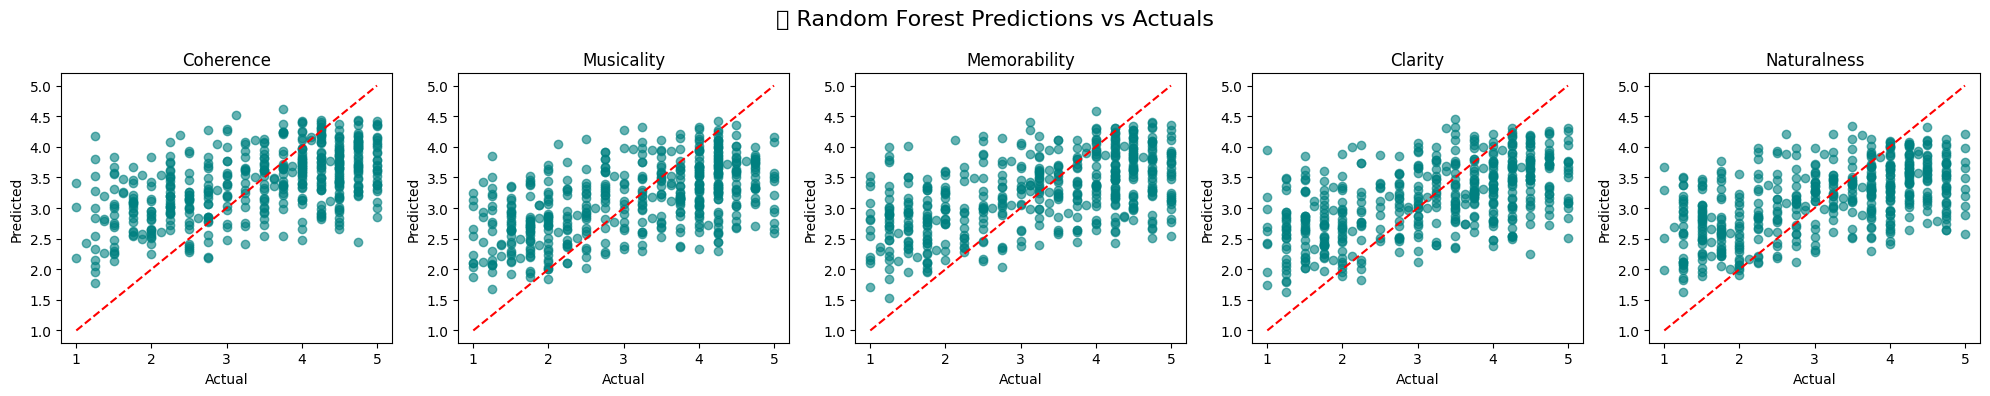

In [ ]:
# Plot true vs predicted for each target
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, col in enumerate(TARGET_COLUMNS):
    axes[i].scatter(y_test[:, i], y_pred[:, i], alpha=0.6, color='teal')
    axes[i].plot([y_test[:, i].min(), y_test[:, i].max()],
                 [y_test[:, i].min(), y_test[:, i].max()],
                 'r--')
    axes[i].set_title(col)
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")

plt.suptitle(" Random Forest Predictions vs Actuals", fontsize=16)
plt.tight_layout()
plt.show()


## Inspect a few random sample predictions

In [ ]:
# Select a few random examples for quick inspection
indices = np.random.choice(len(y_test), 5, replace=False)
sample_df = pd.DataFrame({
    "Actual_" + col: y_test[indices, i] for i, col in enumerate(TARGET_COLUMNS)
})
for i, col in enumerate(TARGET_COLUMNS):
    sample_df["Pred_" + col] = y_pred[indices, i]

print("🎧 Random sample predictions:")
display(sample_df.round(3))


🎧 Random sample predictions:


,Actual_Coherence,Actual_Musicality,Actual_Memorability,Actual_Clarity,Actual_Naturalness,Pred_Coherence,Pred_Musicality,Pred_Memorability,Pred_Clarity,Pred_Naturalness
0,4.50,4.00,4.25,4.00,3.25,3.750,3.534,3.709,3.509,3.339
1,4.50,4.00,4.25,3.50,3.00,3.385,3.053,3.210,2.981,3.184
2,4.00,3.75,3.75,4.00,3.50,3.641,3.476,3.670,3.396,3.438
3,2.25,1.75,1.50,1.50,1.75,3.522,3.432,3.403,3.261,3.437
4,2.50,2.50,2.75,2.25,2.00,2.989,2.573,2.915,2.770,2.669


# Statistical Measurements of Model Reliablity

## R² scores

In [ ]:
from sklearn.metrics import r2_score
for i, col in enumerate(TARGET_COLUMNS):
    print(col, r2_score(y_test[:, i], y_pred[:, i]))

#results show weak Performance

Coherence 0.29172340556594245
Musicality 0.2999088895058646
Memorability 0.2970864031741435
Clarity 0.3126799034851774
Naturalness 0.3060764468178806


## MAE / RMSE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
for i, col in enumerate(TARGET_COLUMNS):
    mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
    print(col, mae, rmse)


Coherence 0.7915457031249999 0.9522146452444149
Musicality 0.8024290798611111 0.9633534526582782
Memorability 0.8555375434027778 1.0363133220282865
Clarity 0.8054609375 0.9703170232084292
Naturalness 0.7816746527777777 0.9542495795878513


## Save the trained model for reuse

In [ ]:
import joblib
model_path = "/content/drive/MyDrive/SongEval_RF_Data/random_forest_model.pkl"
joblib.dump(multi_rf, model_path)
print(f"✅ Model saved successfully at: {model_path}")


✅ Model saved successfully at: /content/drive/MyDrive/SongEval_RF_Data/random_forest_model.pkl
